In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import awkward as ak
import pickle
import os

In [2]:
hbb = ak.from_parquet('parquet/signal/hbb.parquet')
hgg = ak.from_parquet('parquet/signal/hgg.parquet')

In [3]:
qcd = {}
files = os.listdir('parquet/qcd/')
for i in files:
    if 'qcd' in i:
        qcd[i.rstrip('.parquet')] = ak.from_parquet(f'parquet/qcd/{i}')

In [4]:
qcd.keys()

dict_keys(['qcd_800to1000', 'qcd_300to470', 'qcd_1400to1800', 'qcd_2400to3200', 'qcd_1000to1400', 'qcd_600to800', 'qcd_3200toInf', 'qcd_1800to2400', 'qcd_470to600'])

In [5]:
for i in qcd:
    qcd[i] = ak.firsts(qcd[i])

In [6]:
a = [len(qcd[i]) for i in qcd]

In [7]:
def nan_remover(sample):
    if type(sample) == dict:
        for j in sample:
            mask = ak.ones_like(sample[j][sample[j].fields[0]], dtype='bool')
            mask = ak.fill_none(mask, True)
            for k in sample[j].fields:
                mask = mask & (~ak.is_none(ak.nan_to_none(sample[j][k])))
            sample[j] = sample[j][mask]
    else:
        mask = ak.ones_like(sample[sample.fields[0]], dtype='bool')
        mask = ak.fill_none(mask, True)
        for j in sample.fields:
            mask = mask & (~ak.is_none(ak.nan_to_none(sample[j])))
        sample = sample[mask]
    return sample

In [8]:
qcd = nan_remover(qcd)

In [9]:
b = [len(qcd[i]) for i in qcd]

In [11]:
[(a[i] - b[i]) for i in range(len(a))]

[122602, 12967, 93184, 31027, 140063, 97857, 10293, 53340, 74813]

In [12]:
vars = qcd['qcd_470to600'].fields

In [13]:
IL = 44.99

In [14]:
xsec = {}
xsec['qcd_300to470'] = 6833
xsec['qcd_470to600'] = 549.5
xsec['qcd_600to800'] = 156.5
xsec['qcd_800to1000'] = 26.22
xsec['qcd_1000to1400'] = 7.475
xsec['qcd_1400to1800'] = 0.6482
xsec['qcd_1800to2400'] = 0.08742
xsec['qcd_2400to3200'] = 0.005237
xsec['qcd_3200toInf'] = 0.0001353

In [15]:
qcd_frac = {}
for i in qcd:
    qcd_frac[i] = ((xsec[i]*1000)*IL)/len(qcd[i])
qcd_frac['tot'] = sum(qcd_frac.values())
sval = {}
for i in qcd:
    sval[i] = qcd_frac[i]/qcd_frac['tot']
combed = {}
for i in qcd:
    temp = qcd[i]
    combed[i] = temp[np.random.rand(len(temp)) < sval[i]]
qcd = ak.concatenate([combed[x] for x in combed])

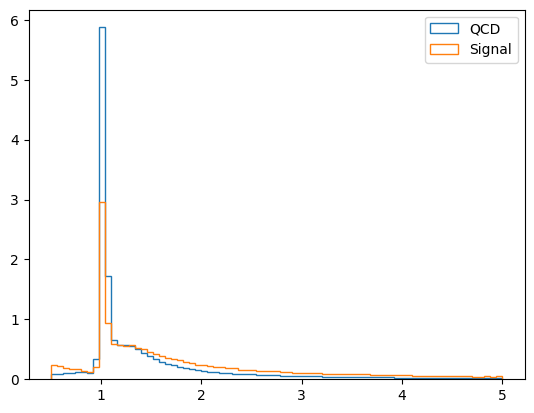

In [16]:
fig, ax = plt.subplots()
plt.hist(qcd['color_ring'], range=(.5,5), bins=75, density=True, histtype='step', label='QCD',#weights=21*np.ones_like(tst)
        )
plt.hist(hgg['color_ring'], range=(.5,5), bins=75, density=True, histtype='step', label='Signal',#weights=21*np.ones_like(tst)
        )
plt.legend()
#plt.yscale('log')
#plt.xlim(100, 5000)
plt.show()

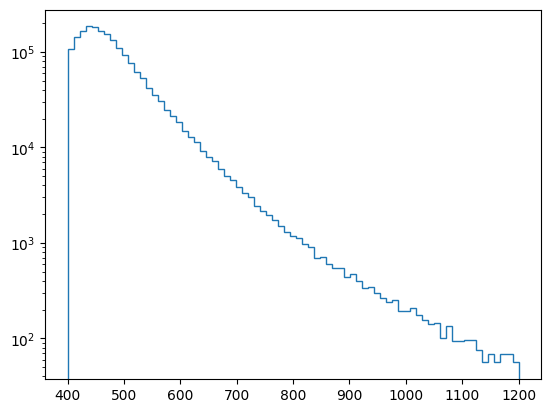

In [17]:
fig, ax = plt.subplots()
plt.hist(qcd['pt'], range=(400,1200), bins=75, histtype='step' #density=True, #weights=21*np.ones_like(tst)
        )
plt.yscale('log')
#plt.xlim(100, 5000)
plt.show()

In [18]:
hgg = nan_remover(hgg)

In [19]:
hbb = nan_remover(hbb)

In [20]:
ak.to_parquet(hgg, 'parquet/combed/hgg.parquet')
ak.to_parquet(hbb, 'parquet/combed/hbb.parquet')
ak.to_parquet(qcd, 'parquet/combed/qcd_w_300to470.parquet')

  created_by: parquet-cpp-arrow version 17.0.0
  num_columns: 20
  num_rows: 1917517
  num_row_groups: 1
  format_version: 2.6
  serialized_size: 0

In [32]:
ttboosted = {}
files = os.listdir('parquet/ttboosted')
for i in files:
    if 'ttboosted' in i:
        ttboosted[i.rstrip('.parquet')] = ak.from_parquet(f'parquet/ttboosted/{i}')

In [33]:
for i in ttboosted:
    ttboosted[i] = ak.firsts(ttboosted[i])

In [34]:
vars = ttboosted['ttboosted_700to1000'].fields

In [35]:
xsec = {}
xsec['ttboosted_700to1000'] = 64.35
xsec['ttboosted_1000toInf'] = 16.44

In [36]:
xsec

{'ttboosted_700to1000': 64.35, 'ttboosted_1000toInf': 16.44}

In [37]:
ttboosted = nan_remover(ttboosted)

In [38]:
ttboosted_frac = {}
for i in ttboosted:
    ttboosted_frac[i] = ((xsec[i]*1000)*IL)/len(ttboosted[i])
ttboosted_frac['tot'] = sum(ttboosted_frac.values())
sval = {}
for i in ttboosted:
    sval[i] = ttboosted_frac[i]/ttboosted_frac['tot']
combed = {}
for i in ttboosted:
    temp = ttboosted[i]
    combed[i] = temp[np.random.rand(len(temp)) < sval[i]]
ttboosted = ak.concatenate([combed[x] for x in combed])

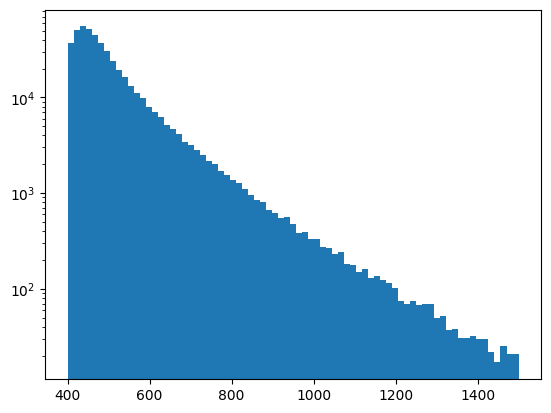

In [39]:
fig, ax = plt.subplots()
plt.hist(ttboosted['pt'], range=(400,1500), bins=75, #density=True, #weights=21*np.ones_like(tst)
        )
plt.yscale('log')
#plt.xlim(100, 5000)
plt.show()

In [40]:
ak.to_parquet(ttboosted, 'parquet/combed/ttboosted.parquet')

  created_by: parquet-cpp-arrow version 17.0.0
  num_columns: 20
  num_rows: 469777
  num_row_groups: 1
  format_version: 2.6
  serialized_size: 0

In [41]:
wqq = {}
files = os.listdir('parquet/wqq')
for i in files:
    if 'wqq' in i:
        wqq[i.rstrip('.parquet')] = ak.from_parquet(f'parquet/wqq/{i}')

In [42]:
for i in wqq:
    wqq[i] = ak.firsts(wqq[i])

In [43]:
vars = wqq['wqq_600to800'].fields

In [44]:
xsec = {}
xsec['wqq_200to400'] = 2574
xsec['wqq_400to600'] = 276.2
xsec['wqq_600to800'] = 58.9
xsec['wqq_800toInf'] = 28.93

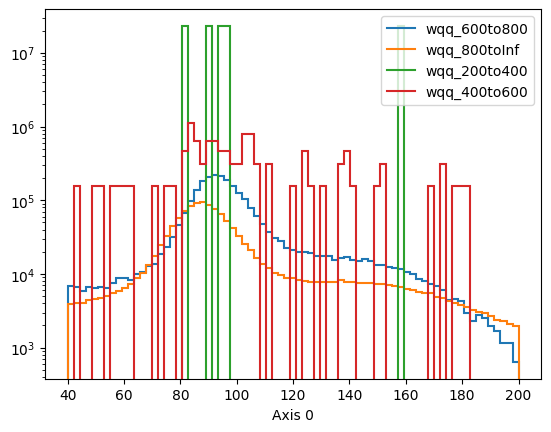

In [45]:
import hist
h = hist.Hist.new.Reg(75, 40, 200).StrCat(list(wqq), name="name").Double()
for name, samp in wqq.items():
    h.fill(samp["msoftdrop"], name, weight=xsec[name]*1000*IL/len(samp))

fig, ax = plt.subplots()
h.plot1d(ax=ax, overlay="name")
ax.set_yscale("log")
ax.legend()

In [46]:
del wqq['wqq_200to400']

In [47]:
del wqq['wqq_400to600']

In [48]:
wqq = nan_remover(wqq)

In [49]:
wqq_frac = {}
for i in wqq:
    wqq_frac[i] = ((xsec[i]*1000)*IL)/len(wqq[i])
wqq_frac['tot'] = sum(wqq_frac.values())
sval = {}
for i in wqq:
    sval[i] = wqq_frac[i]/wqq_frac['tot']
combed = {}
for i in wqq:
    temp = wqq[i]
    combed[i] = temp[np.random.rand(len(temp)) < sval[i]]
wqq = ak.concatenate([combed[x] for x in combed])

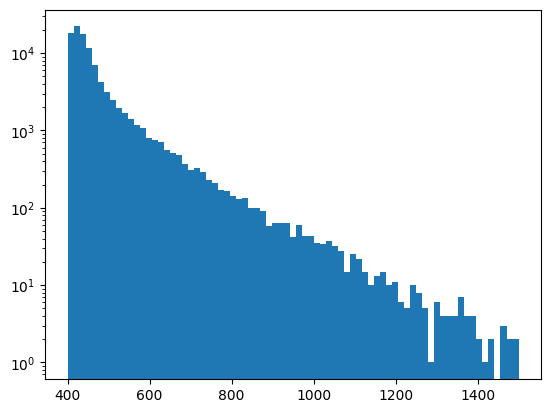

In [50]:
fig, ax = plt.subplots()
plt.hist(wqq['pt'], range=(400,1500), bins=75, #density=True, #weights=21*np.ones_like(tst)
        )
plt.yscale('log')
#plt.xlim(100, 5000)
plt.show()

In [51]:
ak.to_parquet(wqq, 'parquet/combed/wqq.parquet')

  created_by: parquet-cpp-arrow version 17.0.0
  num_columns: 20
  num_rows: 101803
  num_row_groups: 1
  format_version: 2.6
  serialized_size: 0

In [52]:
zqq = {}
files = os.listdir('parquet/zqq')
for i in files:
    if 'zqq' in i:
        zqq[i.rstrip('.parquet')] = ak.from_parquet(f'parquet/zqq/{i}')

In [53]:
for i in zqq:
    zqq[i] = ak.firsts(zqq[i])

In [54]:
vars = zqq['zqq_600to800'].fields

In [55]:
xsec = {}
xsec['zqq_200to400'] = 1006
xsec['zqq_400to600'] = 114.3
xsec['zqq_600to800'] = 25.19
xsec['zqq_800toInf'] = 12.9

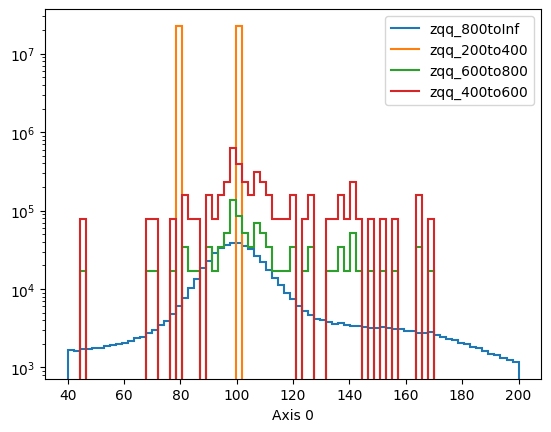

In [56]:
import hist
h = hist.Hist.new.Reg(75, 40, 200).StrCat(list(zqq), name="name").Double()
for name, samp in zqq.items():
    h.fill(samp["msoftdrop"], name, weight=xsec[name]*1000*IL/len(samp))

fig, ax = plt.subplots()
h.plot1d(ax=ax, overlay="name")
ax.set_yscale("log")
ax.legend()

In [57]:
del zqq['zqq_200to400']
del zqq['zqq_400to600']
del zqq['zqq_600to800']

In [58]:
zqq = nan_remover(zqq)

In [59]:
zqq_frac = {}
for i in zqq:
    zqq_frac[i] = ((xsec[i]*1000)*IL)/len(zqq[i])
zqq_frac['tot'] = sum(zqq_frac.values())
sval = {}
for i in zqq:
    sval[i] = zqq_frac[i]/zqq_frac['tot']
combed = {}
for i in zqq:
    temp = zqq[i]
    combed[i] = temp[np.random.rand(len(temp)) < sval[i]]
zqq = ak.concatenate([combed[x] for x in combed])

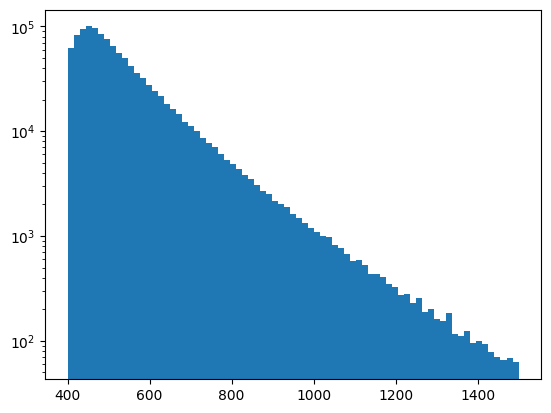

In [60]:
fig, ax = plt.subplots()
plt.hist(zqq['pt'], range=(400,1500), bins=75, #density=True, #weights=21*np.ones_like(tst)
        )
plt.yscale('log')
#plt.xlim(100, 5000)
plt.show()

In [61]:
ak.to_parquet(zqq, 'parquet/combed/zqq.parquet')

  created_by: parquet-cpp-arrow version 17.0.0
  num_columns: 20
  num_rows: 1116320
  num_row_groups: 1
  format_version: 2.6
  serialized_size: 0

In [62]:
singletop = ak.from_parquet('parquet/singletop/singletop.parquet')

In [63]:
singletop = ak.firsts(singletop)

In [64]:
singletop = nan_remover(singletop)

In [65]:
ak.to_parquet(singletop, 'parquet/combed/singletop.parquet')

  created_by: parquet-cpp-arrow version 17.0.0
  num_columns: 20
  num_rows: 30249
  num_row_groups: 1
  format_version: 2.6
  serialized_size: 0

In [66]:
ww = ak.from_parquet('parquet/diboson/ww.parquet')

In [67]:
ww = ak.firsts(ww)

In [68]:
ww = nan_remover(ww)

In [69]:
ak.to_parquet(ww, 'parquet/combed/ww.parquet')

  created_by: parquet-cpp-arrow version 17.0.0
  num_columns: 20
  num_rows: 8939
  num_row_groups: 1
  format_version: 2.6
  serialized_size: 0

In [70]:
wz = ak.from_parquet('parquet/diboson/wz.parquet')

In [71]:
wz = ak.firsts(wz)

In [72]:
wz = nan_remover(wz)

In [73]:
ak.to_parquet(wz, 'parquet/combed/wz.parquet')

  created_by: parquet-cpp-arrow version 17.0.0
  num_columns: 20
  num_rows: 8119
  num_row_groups: 1
  format_version: 2.6
  serialized_size: 0

In [74]:
zz = ak.from_parquet('parquet/diboson/zz.parquet')

In [75]:
zz = ak.firsts(zz)

In [76]:
zz = nan_remover(zz)

In [77]:
ak.to_parquet(zz, 'parquet/combed/zz.parquet')

  created_by: parquet-cpp-arrow version 17.0.0
  num_columns: 20
  num_rows: 2807
  num_row_groups: 1
  format_version: 2.6
  serialized_size: 0

In [78]:
ww4q = ak.from_parquet('parquet/diboson/ww4q.parquet')

In [79]:
ww4q = ak.firsts(ww4q)

In [80]:
ww4q = nan_remover(ww4q)

In [81]:
ak.to_parquet(ww4q, 'parquet/combed/ww4q.parquet')

  created_by: parquet-cpp-arrow version 17.0.0
  num_columns: 20
  num_rows: 10865
  num_row_groups: 1
  format_version: 2.6
  serialized_size: 0